# Week 9: Lab -- Reinforcement Learning: Dynamic Programming
---
Below the Policy iteration is explained step-by-step. Read it carefullybefore you complete 5 exercises.
---

# Policy Iteration Step-by-Step

### 1. Initialization

**Purpose:** Start with arbitrary initializations for the value function and the policy.

- **Value Function Initialization:**  
  $V(s) \in \mathbb{R}$: Assign an initial value for all states $s$. These could be random, zeros, or heuristically determined.
  
- **Policy Initialization:**  
  $\pi(s) \in A(s)$: Assign an initial policy, mapping each state $s$ to an action $a$ arbitrarily.

This step ensures that we have a starting point for both the value function and the policy.

---

### 2. Policy Evaluation

**Goal:** Evaluate how good the current policy $\pi$ is by updating the value function $V(s)$.

#### Loop Description:

1. **Initialize** $\Delta$:  
   $\Delta \leftarrow 0$ (Tracks the maximum change in the value function during updates for convergence).

2. **For each state** $s \in {S}$:
   - Store the current value $v$ of the state:  
     $v \leftarrow V(s)$
   - Update the value function $V(s)$ based on the Bellman expectation equation for the current policy $\pi$:  
     $$V(s) \leftarrow \sum_{s', r} p(s', r \mid s, \pi(s)) \big[ r + \gamma V(s') \big]$$
     - $p(s', r \mid s, \pi(s))$: Transition probability of reaching $s'$ and receiving reward $r$ given state $s$ and action $\pi(s)$.
     - $r + \gamma V(s')$: The immediate reward plus the discounted future value.
   - Update the maximum difference $\Delta$:  $$

3. **Repeat** until $\Delta < \theta$, where $\theta$ is a small positive number indicating convergence.

At the end of this step, $V(s)$ reflects the value of each state under the current policy $\pi$.

---

### 3. Policy Improvement

**Goal:** Use the updated value function $V(s)$ to improve the policy $\pi$.

#### Steps:

1. **Assume the policy is stable:**  
   `policy-stable ← true`

2. **For each state** $s \in {S}$:
   - Store the current action:  
     `old-action ← π(s)`
   - Update the policy by choosing the action that maximizes the expected return:  
     \[
     \pi(s) \leftarrow \arg\max_{a} \sum_{s', r} p(s', r \mid s, a) \big[ r + \gamma V(s') \big]
     \]  
     This step essentially finds the best action for state $s$ based on the updated value function $V(s)$.
   - **If** the policy changes (i.e., `old-action ≠ π(s)`), mark the policy as unstable:  
     `policy-stable ← false`

3. **If the policy is stable** (i.e., no changes were made), terminate the algorithm and return:
   - The optimal value function: $V \approx V^*$
   - The optimal policy: $\pi \approx \pi^*$
   - Otherwise, go back to **Step 2 (Policy Evaluation)** and repeat.


### Setting up the environment!
Here we install all necessary packages and import them.

In [ ]:
# -*- coding: utf-8 -*-
"""COMM055-fall-24-Week9-RL1.ipynb"""

# Install necessary packages
!pip install gym
!pip install gym --upgrade

import gym
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
from IPython import display

# Test if gym is installed
!pip show gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 10.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827618 sha256=b0e3810c5bc81d3abe8e3fccec3ba6e6165bece19fbcee29c6224e66b36d59bb
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
Name: gym
Version: 0.26.2
Summary: Gym: A universal API for reinforcement learning environments
Home-

# Code Explanation step-by-step

### 1. `policy_evaluation`

This function evaluates a given policy by computing the value function `V(s)` for all states `s` in the environment.

#### Arguments:
- `env`: The Gym environment object.
- `policy`: The current policy (deterministic or stochastic) to evaluate.
- `gamma`: The discount factor for future rewards (default: 0.99).
- `theta`: The convergence threshold to stop iteration (default: 1e-8).
- `max_iters`: Maximum number of iterations to avoid infinite loops.

#### Steps:
1. Initialize the value function `V` as a zero array for all states.
2. Iteratively update `V(s)` using the Bellman expectation equation:
   $$
   V(s) = \sum_{s',r} p(s',r|s,a) \cdot (r + \gamma \cdot V(s'))
   $$
   where `a` is the action taken by the policy at state `s`.
3. Stop when the largest change in value (`delta`) is less than `theta`.

#### Output:
- Returns the value function `V` for the given policy.


In [ ]:
# Function to evaluate a policy
def policy_evaluation(env: gym.Env, policy: np.ndarray, gamma: float = 0.99, theta: float = 1e-8, max_iters: int = 1000) -> np.ndarray:
    """
    Evaluates a policy and computes its value function.

    Args:
        env (gym.Env): The Gym environment.
        policy (np.ndarray): The policy to evaluate.
        gamma (float): Discount factor.
        theta (float): Convergence threshold.
        max_iters (int): Maximum number of iterations for policy evaluation.

    Returns:
        np.ndarray: The value function for the policy.
    """
    num_states = env.observation_space.n
    V = np.zeros(num_states)

    for i in range(max_iters):
        delta = 0
        for s in range(num_states):
            a = policy[s]
            V_s = sum(
                [p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]]
            )
            delta = max(delta, abs(V[s] - V_s))
            V[s] = V_s
        if delta < theta:
            break

    return V

In [ ]:
# Function to test a given policy
def test_policy(env: gym.Env, policy: np.ndarray) -> None:
    """
    Tests a tabular policy on a given toy text environment.

    Args:
        env (gym.Env): The Gym environment
        policy (np.ndarray): The tabular policy as a NumPy array.
    """
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    stochastic_policy = policy.shape == (num_states, num_actions)

    steps = 0
    done = False
    state = env.reset()[0]  # Reset the environment and get the initial state

    while not done:
        if stochastic_policy:
            action = np.random.choice(num_actions, p=policy[state])  # Action based on probabilities
            print(f"Selecting action: {action} with probability: {policy[state][action]}")
        else:
            action = int(policy[state])  # Deterministic action
            print(f"Selecting action: {action}")

        # Step in the environment
        next_state, reward, terminated, truncated, _ = env.step(action)
        state = next_state
        done = terminated or truncated
        steps += 1

    print(f"{'Success' if reward == 1 else 'Failed'} in {steps} steps")

### 2. `policy_improvement`

This function improves a given policy using the computed value function `V`.

#### Arguments:
- `env`: The Gym environment object.
- `V`: The value function for the current policy.
- `gamma`: The discount factor for future rewards (default: 0.99).

#### Steps:
1. Initialize a new policy with zeros for all states.
2. For each state `s`, compute the action-value function $Q(s, a)$ for all actions:
   $$
   Q(s, a) = \sum_{s',r} p(s',r|s,a) \cdot (r + \gamma \cdot V(s'))
   $$
3. Select the action `a` that maximizes `Q(s, a)` and update the policy.
4. Check if the policy is stable (i.e., no changes were made).

#### Output:
- Returns the improved policy and a boolean indicating if the policy is stable.

<h1 style="color:red">Exercise 1</h1>
based on the above algorithm complete the code below.

In [ ]:
def policy_improvement(env: gym.Env, V: np.ndarray, gamma: float = 0.99) -> Tuple[np.ndarray, bool]:
    """
    Improves the policy based on the given value function.

    Args:
        env (gym.Env): The Gym environment.
        V (np.ndarray): The value function.
        gamma (float): Discount factor.

    Returns:
        Tuple[np.ndarray, bool]: The improved policy and whether it is stable.
    """
    num_states = env.observation_space.n
    num_actions = env.action_space.n

    #write your code here

### 3. `policy_iteration`

This function performs **Policy Iteration** to find the optimal policy and value function.

#### Arguments:
- `env`: The Gym environment object.
- `stochastic_policy`: Whether the policy is stochastic (default: `False`).

#### Steps:
1. Initialize a random policy.
2. Alternate between:
   - **Policy Evaluation**: Compute the value function for the current policy using `policy_evaluation`.
   - **Policy Improvement**: Improve the policy using `policy_improvement`.
3. Stop when the policy stabilizes.

#### Output:
- Returns the optimal policy and value function.


Policy Iteration consists of two main steps: **Policy Evaluation** and **Policy Improvement**. These steps are repeated iteratively until the policy converges to the optimal policy.

---

### 1. Policy Evaluation

The goal of policy evaluation is to compute the value function $ V_\pi(s) $ for a given policy $ \pi $. This is done by solving the Bellman equation:

$$
V_\pi(s) = \sum_{a} \pi(a|s) \sum_{s', r} P(s', r | s, a) \left[ r + \gamma V_\pi(s') \right]
$$

Where:
- $ s $: Current state
- $ a $: Action
- $ s' $: Next state
- $ r $: Reward
- $ P(s', r | s, a) $: Probability of transitioning to \( s' \) with reward \( r \) after taking action $ a $ in state \( s \)
- $ \gamma $: Discount factor ($ 0 \leq \gamma \leq 1 $)
- $ \pi(a|s) $: Policy probability of taking action \( a \) in state \( s \)

---

### 2. Policy Improvement

The goal of policy improvement is to derive a better policy \( \pi' \) by acting greedily with respect to the value function \( V_\pi(s) \). The updated policy is:

$$
\pi'(s) = \arg\max_a \sum_{s', r} P(s', r | s, a) \left[ r + \gamma V_\pi(s') \right]
$$

Where:
- The action $ a $ that maximizes the expected reward is selected for each state $s$.

---

### Policy Iteration Algorithm

1. **Initialization**:
   - Initialize a random policy $ \pi_0 $.
   - Set $ k = 0 $.

2. **Iterative Steps**:
   - **Policy Evaluation**: Compute $ V_{\pi_k}(s) $ for the current policy $ \pi_k $.
   - **Policy Improvement**: Update the policy $ \pi_{k+1} $ using the greedy policy derived from $ V_{\pi_k}(s) $:
     
     $$\pi_{k+1}(s) = \arg\max_a \sum_{s', r} P(s', r | s, a) \left[ r + \gamma V_{\pi_k}(s') \right]$$

3. **Convergence**:
   - Repeat the evaluation and improvement steps until the policy $ \pi_k $ is stable (i.e., no longer changes between iterations).


<h1 style="color:red">Exercise 2</h1>
based on the above algorithm complete the code below.

In [ ]:
def policy_iteration(env: gym.Env, gamma: float = 0.99, max_iters: int = 1000) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs Policy Iteration.

    Args:
        env (gym.Env): The Gym environment.
        gamma (float): Discount factor.
        max_iters (int): Maximum number of iterations for policy iteration.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Optimal policy and value function.
    """
    num_states = env.observation_space.n
    policy = np.zeros(num_states, dtype=np.int32)

    #for i in range(max_iters):
    #Write your code here


<h1 style="color:red">Exercise 3</h1>
Have a look at the loop and the </b>max_iter</b> from above code. Think why do we really need to run this loop as many times as needed for the policy to converge?

<i style="color:green">Write your answer here</i>

### 4. `value_iteration`

This function uses **Value Iteration** to compute the optimal policy and value function.

#### Arguments:
- `env`: The Gym environment object.
- `gamma`: The discount factor for future rewards (default: 0.99).
- `theta`: The convergence threshold to stop iteration (default: 1e-8).

#### Steps:
1. Initialize the value function `V` as a zero array for all states.
2. Iteratively update `V(s)` using the Bellman optimality equation:
   $V(s) = \max_a \sum_{s',r} p(s',r|s,a) \cdot (r + \gamma \cdot V(s'))$
3. Stop when the largest change in value (`delta`) is less than `theta`.
4. Derive the optimal policy by selecting the action that maximizes `Q(s, a)` for each state.

#### Output:
- Returns the optimal policy and value function.


### Value Iteration

Value Iteration is an iterative algorithm used to compute the **optimal value function** $V^*(s)$ and derive the **optimal policy** $\pi^*(s) $. It is based on the Bellman optimality equation.

---

### Bellman Optimality Equation for Value Iteration

The Bellman optimality equation for the value function is:


$$V^*(s) = \max_a \sum_{s', r} P(s', r | s, a) \left[ r + \gamma V^*(s') \right]$$

Where:
- $ V^*(s) $: Optimal value function for state $s$
- $ a $: Action
- $ s' $: Next state
- $ r $: Reward
- $ P(s', r | s, a) $: Transition probability of moving to state $s'$ with reward $ r $ when taking action $ a $ in state $ s $
- $ \gamma $: Discount factor ($ 0 \leq \gamma \leq 1 $)

---

### Value Iteration Algorithm

1. **Initialization**:
   - Initialize $ V(s) = 0$ (or any arbitrary values) for all states $s$.

2. **Iterative Update**:
   - For each state $ s $, update the value function using the Bellman optimality equation:

     $V(s) \leftarrow \max_a \sum_{s', r} P(s', r | s, a) \left[ r + \gamma V(s') \right]$
   - Compute the maximum change (delta) across all states:
     $\delta = \max_s \left| V_{\text{new}}(s) - V_{\text{old}}(s) \right|$

3. **Convergence**:
   - Repeat the updates until $ \delta < \theta $, where $ \theta $ is a small threshold for convergence.

4. **Derive the Optimal Policy**:
   - After $ V^*(s) $ converges, derive the optimal policy $\pi^*(s)$ by selecting the action that maximizes the expected reward:

     $\pi^*(s) = \arg\max_a \sum_{s', r} P(s', r | s, a) \left[ r + \gamma V^*(s') \right]$

---

#### Key Differences from Policy Iteration

- **Value Iteration** combines the policy evaluation and improvement steps into a single process by directly computing the optimal value function.
- **Policy Iteration** separates policy evaluation and policy improvement steps.


In [ ]:
def value_iteration(env: gym.Env, gamma: float = 0.99, theta: float = 1e-8) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs Value Iteration.

    Args:
        env (gym.Env): The Gym environment.
        gamma (float): Discount factor.
        theta (float): Convergence threshold.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Optimal policy and value function.
    """
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    V = np.zeros(num_states)

    while True:
        delta = 0
        for s in range(num_states):
            Q = [
                sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]])
                for a in range(num_actions)
            ]
            max_q = max(Q)
            delta = max(delta, abs(V[s] - max_q))
            V[s] = max_q
        if delta < theta:
            break
    policy = np.zeros(num_states, dtype=np.int32)
    for s in range(num_states):
        Q = [
            sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]])
            for a in range(num_actions)
        ]
        policy[s] = np.argmax(Q)

    return policy, V

### 5. `visualize_policy_execution`

This function visualizes the execution of the optimal policy in the environment.

#### Arguments:
- `env`: The Gym environment object.
- `policy`: The optimal policy to execute.

#### Steps:
1. Reset the environment and render its initial state.
2. Execute actions from the policy until the agent reaches a terminal state.
3. Render each step and display it using Matplotlib.

#### Output:
- A visualization of the policy execution.

In [ ]:
# Function to visualize policy execution
def visualize_policy_execution(env: gym.Env, policy: np.ndarray) -> None:
    """
    Visualizes the execution of the optimal policy in the environment.

    Args:
        env (gym.Env): The Gym environment.
        policy (np.ndarray): The optimal policy.
    """
    state = env.reset()[0]
    done = False

    while not done:
        # Render the environment and capture the RGB array
        img = env.render()
        plt.imshow(img)
        plt.title(f"State: {state}, Action: {policy[state]}")
        plt.axis("off")
        display.clear_output(wait=True)
        display.display(plt.gcf())

        # Take the action based on the policy
        action = int(policy[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        state = next_state
        done = terminated or truncated

    plt.close()
    print(f"{'Success!' if reward == 1 else 'Failed!'}")

### Main Function (`if __name__ == "__main__":`)

1. **Environment Initialization**:
   - Initializes the `FrozenLake-v1` environment with `render_mode="rgb_array"`.

2. **Value or Policy Iteration**:
   - Executes either **Policy Iteration** or **Value Iteration** based on the `PolicyIteration` flag.
   - Prints the optimal policy and value function.

3. **Testing and Visualization**:
   - Tests the computed policy using `test_policy`.
   - Visualizes the policy execution using `visualize_policy_execution`.

4. **Error Handling and Cleanup**:
   - Catches and prints any errors.
   - Ensures the environment is closed properly to release resources.

In [ ]:
# Main function
if __name__ == "__main__":
    try:
        # Initialize the environment
        env = gym.make("FrozenLake-v1", render_mode="rgb_array")

        PolicyIteration = True
        if PolicyIteration == True:
          # Perform Policy Iteration
          print("Running Policy Iteration...")
          opt_policy, opt_value = policy_iteration(env)
          print("Optimal Policy:", opt_policy)
          print("Optimal Value Function:", opt_value)
        else:
          # Compute the optimal policy and value function
          print("Running Value Iteration to compute the optimal policy...")
          opt_policy, opt_value = policy_iteration(env)
          print("Optimal Policy:", opt_policy)
          print("Optimal Value Function:", opt_value)


        # Test the policy
        print("\nTesting the computed policy...")
        test_policy(env, opt_policy)

    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
        # Close the environment to release resources
        env.close()
        print("Environment closed.")


Running Policy Iteration...
Optimal Policy: [0 3 3 3 0 0 0 0 3 1 0 0 0 2 1 0]
Optimal Value Function: [0.54202581 0.49880303 0.4706955  0.4568515  0.55845085 0.
 0.35834799 0.         0.59179866 0.64307976 0.6152075  0.
 0.         0.7417204  0.86283741 0.        ]

Testing the computed policy...
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 3
Selecting action: 3
Selecting action: 0
Selecting action: 0
Selecting action: 3
Selecting action: 0
Selecting action: 3
Selecting action: 3
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 3
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Selecting action: 0
Se

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


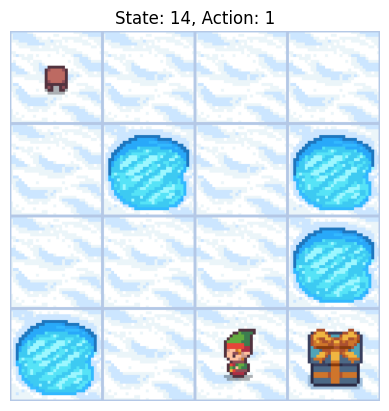

Success!


In [ ]:
# Visualize the policy execution
print("\nVisualizing the optimal policy execution...")
visualize_policy_execution(env, opt_policy)

<h1 style="color:red">Exercise 4</h1>
Do the actions of the agent in the FrozenLake environment result in deterministic transitions? How is this captured in what you have seen?

In [ ]:
#write your answer here

<h1 style="color:red">Exercise 5</h1>
Repeat the experiment above and apply it with Taxi environment.<br>
Note: Replace "FrozenLake-v1" with "Taxi-v3" in gym.make() method. <br>

In [ ]:
#write your code here

Make sure you understand what is the goal of the agent in both environments and what reward the agent is trying to maximise.